# Recurrent Neural Network

## 1. Import librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


## 2. Data Preprocessing

#### 2.1. Importing the training set

In [2]:
dataset_train = pd.read_csv('../data/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

#### 2.2. Feature Scaling

In [3]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

#### 2.3. Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#### 2.4. Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


## 3. Building the RNN

#### 3.1. Initialising the RNN

In [6]:
regressor = Sequential()

W0505 12:14:32.627987 140342731036480 deprecation_wrapper.py:119] From /gpfs/user/u555116/brc01/aim00/.venv3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



#### 3.2. Adding the first LSTM layer and some Dropout regularisation

In [7]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

W0505 12:14:57.017650 140342731036480 deprecation_wrapper.py:119] From /gpfs/user/u555116/brc01/aim00/.venv3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0505 12:14:57.020649 140342731036480 deprecation_wrapper.py:119] From /gpfs/user/u555116/brc01/aim00/.venv3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0505 12:14:57.320700 140342731036480 deprecation_wrapper.py:119] From /gpfs/user/u555116/brc01/aim00/.venv3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0505 12:14:57.327751 140342731036480 deprecation.py:506] From /gpfs/user/u555116/brc01/aim00/.venv3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (

#### 3.3. Adding a second LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### 3.4.  Adding a third LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### 3.5. Adding a fourth LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [11]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


W0505 12:20:30.331943 140342731036480 deprecation_wrapper.py:119] From /gpfs/user/u555116/brc01/aim00/.venv3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0505 12:20:30.651969 140342731036480 deprecation.py:323] From /gpfs/user/u555116/brc01/aim00/.venv3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0505 12:20:33.322355 140342731036480 deprecation_wrapper.py:119] From /gpfs/user/u555116/brc01/aim00/.venv3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0529
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0039
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

Epoch 97/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0017


## 4. Making the predictions and visualising the results


#### 4.1. Getting the real stock price of 2017

In [12]:
dataset_test = pd.read_csv('../data/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

#### 4.2. Getting the predicted stock price of 2017


In [13]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#### 4.3. Visualising the results

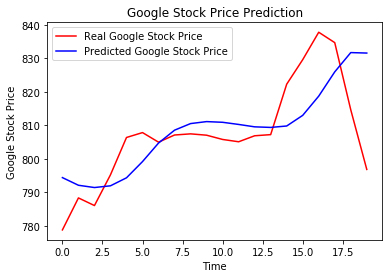

In [14]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
